# Cross Validation
* Notebook completed by Adam Lang
* Date: 4/15/2024 This notebook will go over Cross Validation commonly used in Machine Learning to compare models with implementation in Python. This was completed as part of the Springboard Data Science Fellowship and LinkedIn Learning course "Python Statistics Essential Training."


In [46]:
# imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

## Loading Gapminder data for year 1985 (Live Aid!) and setting up plot

In [2]:
# load data
gapminder = pd.read_csv('/content/drive/MyDrive/Springboard_Data_Science/Statistics_Chapter/gapminder.csv')

In [3]:
# select query 1985 data
gdata = gapminder.query('year == 1985')

In [6]:
# data function
def sc(data):
  return 1e-6 * data.population, data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

# function plotdata
def plotdata(data=gdata):
  size, colors = sc(data)
  data.plot.scatter('age5_surviving', 'babies_per_woman',
                     c=colors, s=size, linewidths=0.5, edgecolor='k', alpha=0.5)

# function for plotfit
def plotfit(fit, data=gdata):
  plotdata(data)
  size, colors = sc(data)
  plt.scatter(data.age5_surviving,fit.predict(data),
              c=colors,s=30, linewidths=0.5, edgecolor='k', marker='D')

#### Model Formulas

In [47]:
f_groupmeans = 'babies_per_woman ~ -1 + region'
f_surviving = 'babies_per_woman ~ -1 + region + age5_surviving'
f_srp = {'babies_per_woman ~ -1 + region + age5_surviving'
        ' + age5_surviving:region - age5_surviving + population'}

### Shuffle data

In [35]:
shuffled = gdata.sample(len(gdata))

### Build training, testing data

In [36]:
training, testing = shuffled.iloc[:len(gdata)//2], shuffled.iloc[len(gdata)//2:]

### Fit model to training data

In [37]:
surviving = smf.ols(f_surviving, data=training).fit()

### Plot result

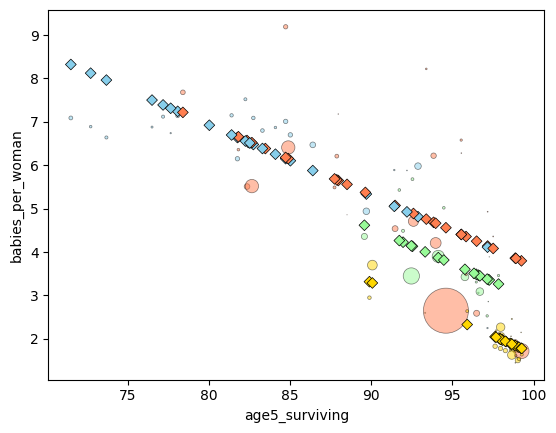

In [38]:
plotfit(surviving, training)

### What is in sample mean squared error?


In [39]:
surviving.mse_resid

1.0035300726334946

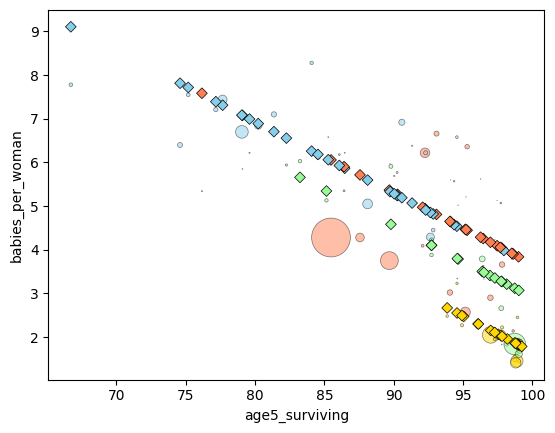

In [40]:
## plot fit
plotfit(surviving, testing)

### Compute mean squared error

In [41]:
# residuals
resid = surviving.predict(testing) - testing.babies_per_woman
df = len(testing) - surviving.df_model - 1
np.sum(resid**2) / df

0.9927404820435977

### Cross Validation

In [42]:
## define function
def cross_validate(data, formula, response, n=100):
  ret = []

  for i in range(n):
    shuffled = data.sample(len(data))

    training, testing = shuffled.iloc[:len(data)//2], shuffled.iloc[len(data)//2:]

    trained = smf.ols(formula, data=training).fit()

    resid = trained.predict(testing) - testing[response]
    df = len(testing) - trained.df_model - 1
    mse = np.sum(resid**2) / df

    ret.append(mse)

  return np.mean(ret)

In [43]:
# run the cross_valdate function
cross_validate(gdata, f_groupmeans, 'babies_per_woman')

1.6542356093148909

In [44]:
# cross validate next model
cross_validate(gdata, f_surviving, 'babies_per_woman')

1.0598767715722144